# Bài 2:

In [12]:
# # Đọc dữ liệu
# df = pd.read_csv('bang_can_nang_chieu_cao.csv')
# df
# ## SVD
# W = df['Chieu cao (cm)']
# W_scaled = scaler.fit_transform(W.values.reshape(-1, 1))
# d = df['Can nang (kg)']
# W_scaled = np.c_[np.ones((W_scaled.shape[0], 1)), W_scaled]
# height = np.array([[170]])
# scaled_height = scaler.transform(height)
# scaled_height = np.c_[np.ones((scaled_height.shape[0])), scaled_height]

# # SVD decomposition
# x_svd = svd_decomposition(W_scaled, d)
# predicted_weight_svd = scaled_height.dot(x_svd)
# print("Hệ số dự đoán là:", x_svd)
# print("Giá trị dự đoán được là:", predicted_weight_svd[0])
# ## Gradient descent
# initial_point = np.zeros(W_scaled.shape[1])

# # Dự đoán cho chiều cao 170
# height = np.array([[170]])
# scaled_height = scaler.transform(height)
# scaled_height = np.c_[np.ones((scaled_height.shape[0])), scaled_height]
# x_gd = gradient_descent(W_scaled, d, initial_point, 0.001, 10000, 1e-6)
# predicted_weight_gd = scaled_height.dot(x_gd)
# print("Hệ số dự đoán là:", x_gd)
# print("Giá trị dự đoán được là:", predicted_weight_gd[0])
# print("Chênh lệch giữa 2 phương pháp:", L2_error(x_svd, x_gd))
# ## Accelerated gradient descent
# # Accelerated gradient descent
# x_agd = accelerated_gradient_descent(W_scaled, d, initial_point, 0.001, 10000, 1e-6)
# predicted_weight_agd = scaled_height.dot(x_agd)
# print("Hệ số dự đoán là:", x_agd)
# print("Giá trị dự đoán được là:", predicted_weight_agd[0])
# print("Chênh lệch giữa 2 phương pháp:", L2_error(x_svd, x_agd))
# ## Stochastic gradient descent
# # Stochastic gradient descent
# x_sgd = stochastic_gradient_descent(W_scaled, d, initial_point, 0.001, 10000, 1e-6)
# predicted_weight_sgd = scaled_height.dot(x_sgd)
# print("Hệ số dự đoán là:", x_sgd)
# print("Giá trị dự đoán được là:", predicted_weight_sgd[0])
# print("Chênh lệch hệ số dự đoán:", L2_error(x_svd, x_sgd))
# ## Sklearn
# # Train test split
# X_train, X_test, y_train, y_test = train_test_split(W_scaled, d, test_size=0.2, random_state=42)
# model = LinearRegression()
# model.fit(X_train, y_train)
# coefficients = model.coef_
# intercept = model.intercept_

# # Using sklearn
# predicted_weight_sklearn = model.predict(scaled_height)
# coefficients[0] = intercept
# print("Hệ số dự đoán (sklearn):", coefficients)
# print(f"Dự đoán giá trị: {predicted_weight_sklearn[0]}")
# print("Chênh lệch hệ số dự đoán:", L2_error(x_svd, coefficients))

In [13]:
import numpy as np
import pandas as pd

df = pd.read_csv('bang_cho_vay.csv')
df

,Luong,Thoi gian lam viec,Cho vay
0,10,1.00,1
1,5,2.00,1
2,6,1.80,1
3,7,1.00,1
4,8,2.00,1
5,9,0.50,1
6,4,3.00,1
7,5,2.50,1
8,8,1.00,1
9,4,2.50,1


In [14]:
# Chuẩn bị dữ liệu
X = df[['Luong', 'Thoi gian lam viec']].values
y = df['Cho vay'].values
X = np.c_[np.ones(X.shape[0]), X]
initial_weight = np.zeros(X.shape[1])
X_new = np.array([[1, 9, 0.5]])

In [42]:
# Áp dụng gradient descent để viết hàm tính xác suất cho vay
def hat_yi(w, X):
    return 1 / (1 + np.exp(-(X @ w)))

def nabla_L(theta, X, y):
    hat_y = 1 / (1 + np.exp(-(X @ theta)))
    gradient = X.T @ (hat_y - y)
    return gradient

def gradient_descent(X, y, initial_weight, eta, max_iterations, epsilon):
    current_weight = initial_weight.copy()
    i = 0
    while i <= max_iterations:
        next_weight = current_weight - eta * nabla_L(current_weight, X, y)
        if np.linalg.norm(nabla_L(next_weight, X, y)) < epsilon:
            return next_weight
        current_weight = next_weight
        i += 1
    return next_weight

def z(w, X):
    return X.dot(w)

def threshold(s):
    return -np.log(1 / s - 1)

weights = gradient_descent(X, y, initial_weight, 1e-2, 1000000, 1e-6)
probability = hat_yi(weights, X_new)
print("Hệ số dự đoán là:", weights)
print("Giá trị dự đoán được là:", probability)
print("Xác suất cho vay cho người có lương 9 triệu và thời gian làm việc 0.5 năm là:", probability[0] * 100, "%")

Hệ số dự đoán là: [-50.38142595   5.06751838  22.03945991]
Giá trị dự đoán được là: [0.9980655]
Xác suất cho vay cho người có lương 9 triệu và thời gian làm việc 0.5 năm là: 99.80654988851136 %


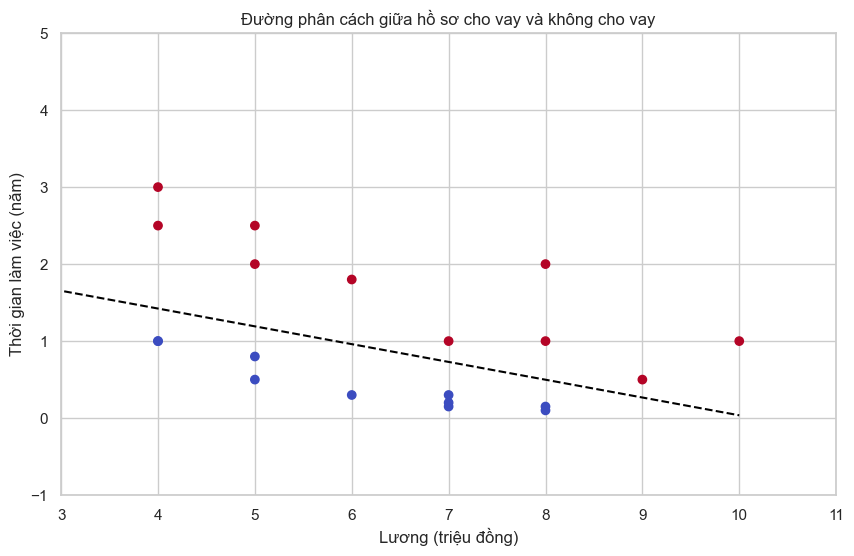

In [16]:
# Giả sử ngân hàng yêu cầu hồ sơ đạt 80% mới cho vay, vẽ đồ thị phân cách giữa hồ sơ cho vay và không cho vay
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.scatter(df['Luong'], df['Thoi gian lam viec'], c=df['Cho vay'], cmap='coolwarm')
plt.xlabel('Lương (triệu đồng)')
plt.ylabel('Thời gian làm việc (năm)')
plt.title('Phân loại hồ sơ cho vay')

plt.xlim(3, 11)
plt.ylim(-1, 5)

# Vẽ đường phân cách
x1 = np.linspace(0, 10, 100)
x2 = np.linspace(0, 10, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = weights[0] + weights[1]*X1 + weights[2]*X2
plt.contour(X1, X2, Z, levels=[0.8], colors='black', linestyles='--')
plt.title('Đường phân cách giữa hồ sơ cho vay và không cho vay')
plt.show()

In [40]:
# Accelerated Gradient Descent
def accelerated_gradient_descent(W, d, initial_weight, eta, max_iterations, epsilon):
    current_weight = initial_weight.copy()
    previous_weight = initial_weight.copy()
    i = 0
    while i <= max_iterations - 1:
        temp = current_weight + (i - 1) / (i + 2) * (current_weight - previous_weight) 
        next_weight = temp - eta * nabla_L(temp, X, y)
        if np.linalg.norm(nabla_L(next_weight, X, y)) < epsilon:
            return next_weight
        previous_weight = current_weight
        current_weight = next_weight
        i += 1
    return next_weight

weights = accelerated_gradient_descent(X, y, initial_weight, 1e-3, 1000, 1e-6)
probability = hat_yi(weights, X_new)
print("Hệ số dự đoán là:", weights)
print("Giá trị dự đoán được là:", probability)
print("Xác suất cho vay cho người có lương 9 triệu và thời gian làm việc 0.5 năm là:", probability[0] * 100, "%")

Hệ số dự đoán là: [-24.61200015   2.4570527   10.60092537]
Giá trị dự đoán được là: [0.9427804]
Xác suất cho vay cho người có lương 9 triệu và thời gian làm việc 0.5 năm là: 94.2780396909299 %


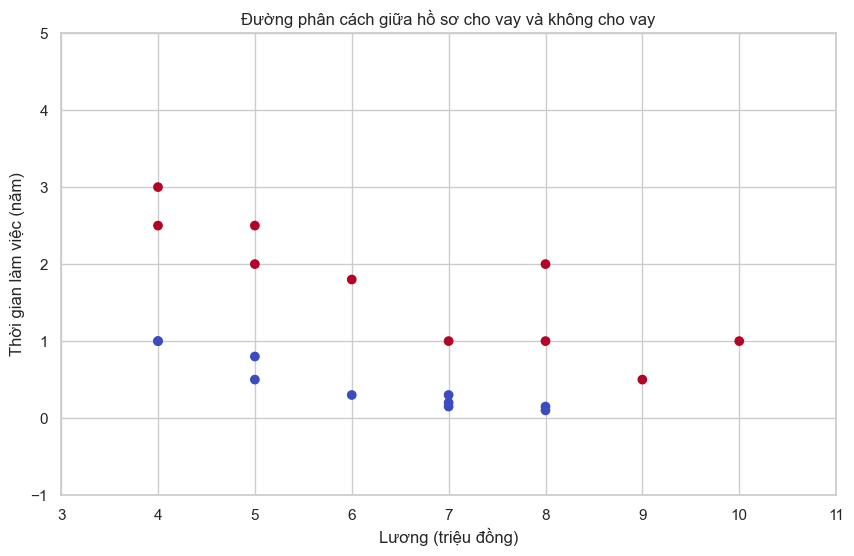

In [18]:
# Giả sử ngân hàng yêu cầu hồ sơ đạt 80% mới cho vay, vẽ đồ thị phân cách giữa hồ sơ cho vay và không cho vay
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.scatter(df['Luong'], df['Thoi gian lam viec'], c=df['Cho vay'], cmap='coolwarm')
plt.xlabel('Lương (triệu đồng)')
plt.ylabel('Thời gian làm việc (năm)')
plt.title('Phân loại hồ sơ cho vay')

plt.xlim(3, 11)
plt.ylim(-1, 5)

# Vẽ đường phân cách
x1 = np.linspace(0, 10, 100)
x2 = np.linspace(0, 10, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = weights[0] + weights[1]*X1 + weights[2]*X2
plt.contour(X1, X2, Z, levels=[0.8], colors='black', linestyles='--')
plt.title('Đường phân cách giữa hồ sơ cho vay và không cho vay')
plt.show()